In [238]:
import numpy as np
import statsmodels.api as sm
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns

In [239]:
data = pd.read_csv("Bangaluru_Wind Generation.csv",index_col=0)

data.head()

T amb (Degree)  DewPoint\r\n(Degree)  \
Timeseries                                              
01/01/2007 0:00            17.6                   8.1   
01/01/2007 1:00            17.9                  10.8   
01/01/2007 2:00            19.0                  10.8   
01/01/2007 3:00            20.6                  10.6   
01/01/2007 4:00            22.8                  10.1   

                 Relative Humidity\r\n(%)  Pressure mBar  WindDir (Degree)  \
Timeseries                                                                   
01/01/2007 0:00                      60.1          940.4               101   
01/01/2007 1:00                      63.1          941.4               114   
01/01/2007 2:00                      59.3          942.1               116   
01/01/2007 3:00                      52.8          942.4               113   
01/01/2007 4:00                      44.6          942.3               106   

                 Wind Speed at 76.8 m\r\n(m/sec)  Power Generated\r\n(kw)  \
Timeseries                                                                  
01/01/2007 0:00                             4.08                    57.36   
01/01/2007 1:00                             4.74                    89.54   
01/01/2007 2:00                             5.55                   143.86   
01/01/2007 3:00                             6.04                   184.45   
01/01/2007 4:00                             6.21                   198.31   

                 Unnamed: 8  Unnamed: 9  
Timeseries                               
01/01/2007 0:00         NaN         NaN  
01/01/2007 1:00         NaN         NaN  
01/01/2007 2:00         NaN         NaN  
01/01/2007 3:00         NaN         NaN  
01/01/2007 4:00         NaN         NaN

<AxesSubplot:xlabel='Timeseries'>

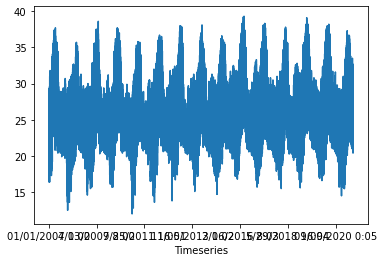

In [240]:
data["T amb (Degree)"].plot()

<AxesSubplot:xlabel='Timeseries'>

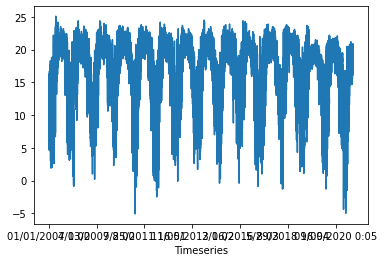

In [241]:
data["DewPoint\r\n(Degree)"].plot()

<AxesSubplot:xlabel='Timeseries'>

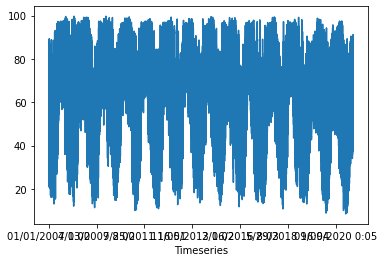

In [242]:
data["Relative Humidity\r\n(%)"].plot()

<AxesSubplot:xlabel='Timeseries'>

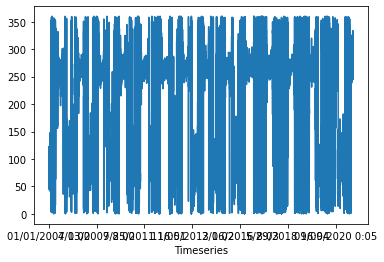

In [243]:
data["WindDir (Degree)"].plot()

<AxesSubplot:xlabel='Timeseries'>

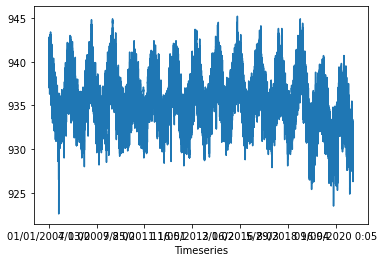

In [244]:
data["Pressure mBar"].plot()

<AxesSubplot:xlabel='Timeseries'>

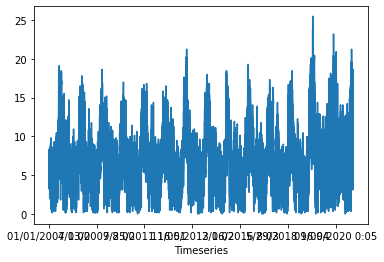

In [245]:
data["Wind Speed at 76.8 m\r\n(m/sec)"].plot()

<AxesSubplot:xlabel='Timeseries'>

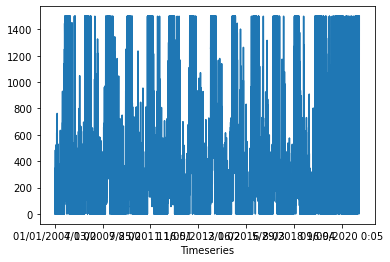

In [246]:
data["Power Generated\r\n(kw)"].plot()

In [247]:
data.isnull().sum()

T amb (Degree)                          0
DewPoint\r\n(Degree)                    0
Relative Humidity\r\n(%)                3
Pressure mBar                           0
WindDir (Degree)                        0
Wind Speed at 76.8 m\r\n(m/sec)         0
Power Generated\r\n(kw)                 0
Unnamed: 8                         127392
Unnamed: 9                         127392
dtype: int64

In [248]:
print(data.shape)

(127392, 9)


In [249]:
data_dropped = data

In [250]:
print(data_dropped.shape)

(127392, 9)


In [251]:
data.head()

T amb (Degree)  DewPoint\r\n(Degree)  \
Timeseries                                              
01/01/2007 0:00            17.6                   8.1   
01/01/2007 1:00            17.9                  10.8   
01/01/2007 2:00            19.0                  10.8   
01/01/2007 3:00            20.6                  10.6   
01/01/2007 4:00            22.8                  10.1   

                 Relative Humidity\r\n(%)  Pressure mBar  WindDir (Degree)  \
Timeseries                                                                   
01/01/2007 0:00                      60.1          940.4               101   
01/01/2007 1:00                      63.1          941.4               114   
01/01/2007 2:00                      59.3          942.1               116   
01/01/2007 3:00                      52.8          942.4               113   
01/01/2007 4:00                      44.6          942.3               106   

                 Wind Speed at 76.8 m\r\n(m/sec)  Power Generated\r\n(kw)  \
Timeseries                                                                  
01/01/2007 0:00                             4.08                    57.36   
01/01/2007 1:00                             4.74                    89.54   
01/01/2007 2:00                             5.55                   143.86   
01/01/2007 3:00                             6.04                   184.45   
01/01/2007 4:00                             6.21                   198.31   

                 Unnamed: 8  Unnamed: 9  
Timeseries                               
01/01/2007 0:00         NaN         NaN  
01/01/2007 1:00         NaN         NaN  
01/01/2007 2:00         NaN         NaN  
01/01/2007 3:00         NaN         NaN  
01/01/2007 4:00         NaN         NaN

In [82]:
mod = sm.tsa.arima.ARIMA(data["Power Generated\r\n(kw)"], order=(1,0,0))
res = mod.fit()
print(res.summary())

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Power Generated
(kw)   No. Observations:               127392
Model:                    ARIMA(1, 0, 0)   Log Likelihood             -733543.432
Date:                   Mon, 31 Oct 2022   AIC                        1467092.864
Time:                           22:04:30   BIC                        1467122.129
Sample:                                0   HQIC                       1467101.650
                                - 127392                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        352.8342     23.333     15.122      0.000     307.102     398.566
ar.L1          0.9859      0.001   1740.577      0.000       0.985       0.987
sigma2      5874.7460      5.

In [83]:
print(res.forecast(1))
print(res.forecast(2))

127392    1483.782215
dtype: float64
127392    1483.782215
127393    1467.793706
Name: predicted_mean, dtype: float64


D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [84]:
data_dropped.isna()

T amb (Degree)  DewPoint\r\n(Degree)  \
Timeseries                                                  
2007-01-01 00:00:00           False                 False   
2007-01-01 01:00:00           False                 False   
2007-01-01 02:00:00           False                 False   
2007-01-01 03:00:00           False                 False   
2007-01-01 04:00:00           False                 False   
...                             ...                   ...   
2021-07-13 19:06:00           False                 False   
2021-07-13 20:06:00           False                 False   
2021-07-13 21:06:00           False                 False   
2021-07-13 22:06:00           False                 False   
2021-07-13 23:06:00           False                 False   

                     Relative Humidity\r\n(%)  Pressure mBar  \
Timeseries                                                     
2007-01-01 00:00:00                     False          False   
2007-01-01 01:00:00                     False          False   
2007-01-01 02:00:00                     False          False   
2007-01-01 03:00:00                     False          False   
2007-01-01 04:00:00                     False          False   
...                                       ...            ...   
2021-07-13 19:06:00                     False          False   
2021-07-13 20:06:00                     False          False   
2021-07-13 21:06:00                      True          False   
2021-07-13 22:06:00                      True          False   
2021-07-13 23:06:00                      True          False   

                     WindDir (Degree)  Wind Speed at 76.8 m\r\n(m/sec)  \
Timeseries                                                               
2007-01-01 00:00:00             False                            False   
2007-01-01 01:00:00             False                            False   
2007-01-01 02:00:00             False                            False   
2007-01-01 03:00:00             False                            False   
2007-01-01 04:00:00             False                            False   
...                               ...                              ...   
2021-07-13 19:06:00             False                            False   
2021-07-13 20:06:00             False                            False   
2021-07-13 21:06:00             False                            False   
2021-07-13 22:06:00             False                            False   
2021-07-13 23:06:00             False                            False   

                     Power Generated\r\n(kw)  Unnamed: 8  Unnamed: 9  
Timeseries                                                            
2007-01-01 00:00:00                    False        True        True  
2007-01-01 01:00:00                    False        True        True  
2007-01-01 02:00:00                    False        True        True  
2007-01-01 03:00:00                    False        True        True  
2007-01-01 04:00:00                    False        True        True  
...                                      ...         ...         ...  
2021-07-13 19:06:00                    False        True        True  
2021-07-13 20:06:00                    False        True        True  
2021-07-13 21:06:00                    False        True        True  
2021-07-13 22:06:00                    False        True        True  
2021-07-13 23:06:00                    False        True        True  

[127392 rows x 9 columns]

In [85]:
data_dropped.head()

T amb (Degree)  DewPoint\r\n(Degree)  \
Timeseries                                                  
2007-01-01 00:00:00            17.6                   8.1   
2007-01-01 01:00:00            17.9                  10.8   
2007-01-01 02:00:00            19.0                  10.8   
2007-01-01 03:00:00            20.6                  10.6   
2007-01-01 04:00:00            22.8                  10.1   

                     Relative Humidity\r\n(%)  Pressure mBar  \
Timeseries                                                     
2007-01-01 00:00:00                      60.1          940.4   
2007-01-01 01:00:00                      63.1          941.4   
2007-01-01 02:00:00                      59.3          942.1   
2007-01-01 03:00:00                      52.8          942.4   
2007-01-01 04:00:00                      44.6          942.3   

                     WindDir (Degree)  Wind Speed at 76.8 m\r\n(m/sec)  \
Timeseries                                                               
2007-01-01 00:00:00               101                             4.08   
2007-01-01 01:00:00               114                             4.74   
2007-01-01 02:00:00               116                             5.55   
2007-01-01 03:00:00               113                             6.04   
2007-01-01 04:00:00               106                             6.21   

                     Power Generated\r\n(kw)  Unnamed: 8  Unnamed: 9  
Timeseries                                                            
2007-01-01 00:00:00                    57.36         NaN         NaN  
2007-01-01 01:00:00                    89.54         NaN         NaN  
2007-01-01 02:00:00                   143.86         NaN         NaN  
2007-01-01 03:00:00                   184.45         NaN         NaN  
2007-01-01 04:00:00                   198.31         NaN         NaN

In [267]:
data_dropped=data_dropped.fillna(0)

<AxesSubplot:>

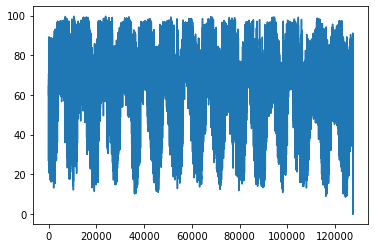

In [269]:
data_dropped["Relative Humidity\r\n(%)"].plot()

In [266]:
data_dropped = data_dropped.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

#### Downloadable csv file

In [90]:
#data_dropped.to_csv("cleandata.csv", sep='\t', encoding='utf-8')

In [268]:
data_dropped.head()

Timeseries  T amb (Degree)  DewPoint\r\n(Degree)  \
0  01/01/2007 0:00            17.6                   8.1   
1  01/01/2007 1:00            17.9                  10.8   
2  01/01/2007 2:00            19.0                  10.8   
3  01/01/2007 3:00            20.6                  10.6   
4  01/01/2007 4:00            22.8                  10.1   

   Relative Humidity\r\n(%)  Pressure mBar  WindDir (Degree)  \
0                      60.1          940.4             101.0   
1                      63.1          941.4             114.0   
2                      59.3          942.1             116.0   
3                      52.8          942.4             113.0   
4                      44.6          942.3             106.0   

   Wind Speed at 76.8 m\r\n(m/sec)  Power Generated\r\n(kw)  
0                             4.08                    57.36  
1                             4.74                    89.54  
2                             5.55                   143.86  
3                             6.04                   184.45  
4                             6.21                   198.31

In [92]:
mod = sm.tsa.arima.ARIMA(data["Relative Humidity\r\n(%)"], order=(1,0,0))
res = mod.fit()
print(res.summary())

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     Relative Humidity
(%)   No. Observations:               127392
Model:                     ARIMA(1, 0, 0)   Log Likelihood             -348277.488
Date:                    Mon, 31 Oct 2022   AIC                         696560.977
Time:                            22:05:27   BIC                         696590.242
Sample:                                 0   HQIC                        696569.762
                                 - 127392                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.4169      0.811     79.463      0.000      62.828      66.006
ar.L1          0.9859      0.001   1571.652      0.000       0.985       0.987
sigma2        13.8743

In [95]:
mod = sm.tsa.arima.ARIMA(data_dropped["Relative Humidity\r\n(%)"], order=(1,0,0))
res = mod.fit()
print(res.summary())

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     Relative Humidity
(%)   No. Observations:               127392
Model:                     ARIMA(1, 0, 0)   Log Likelihood             -348561.250
Date:                    Mon, 31 Oct 2022   AIC                         697128.500
Time:                            22:05:49   BIC                         697157.765
Sample:                                 0   HQIC                        697137.286
                                 - 127392                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.4153      0.796     80.920      0.000      62.855      65.976
ar.L1          0.9859      0.001   1566.481      0.000       0.985       0.987
sigma2        13.9345

In [96]:
data_dropped.describe()

T amb (Degree)  DewPoint\r\n(Degree)  Relative Humidity\r\n(%)  \
count   127392.000000         127392.000000             127392.000000   
mean        25.140319             16.761958                 64.415342   
std          4.075807              4.693364                 22.277394   
min         12.000000             -5.100000                  0.000000   
25%         22.100000             13.700000                 46.400000   
50%         24.400000             18.600000                 67.600000   
75%         27.600000             20.400000                 84.300000   
max         39.300000             25.100000                 99.700000   

       Pressure mBar  WindDir (Degree)  Wind Speed at 76.8 m\r\n(m/sec)  \
count  127392.000000     127392.000000                    127392.000000   
mean      935.451435        188.092832                         6.395340   
std         2.868246         92.355704                         3.463272   
min       922.600000          0.000000                         0.000000   
25%       933.500000         93.000000                         3.760000   
50%       935.400000        242.000000                         5.720000   
75%       937.500000        266.000000                         8.330000   
max       945.200000        360.000000                        25.480000   

       Power Generated\r\n(kw)  
count            127392.000000  
mean                352.834194  
std                 457.078930  
min                   0.000000  
25%                   0.000000  
50%                 152.610000  
75%                 476.670000  
max                1500.000000

In [97]:
data_dropped.isnull().sum()

T amb (Degree)                     0
DewPoint\r\n(Degree)               0
Relative Humidity\r\n(%)           0
Pressure mBar                      0
WindDir (Degree)                   0
Wind Speed at 76.8 m\r\n(m/sec)    0
Power Generated\r\n(kw)            0
dtype: int64

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


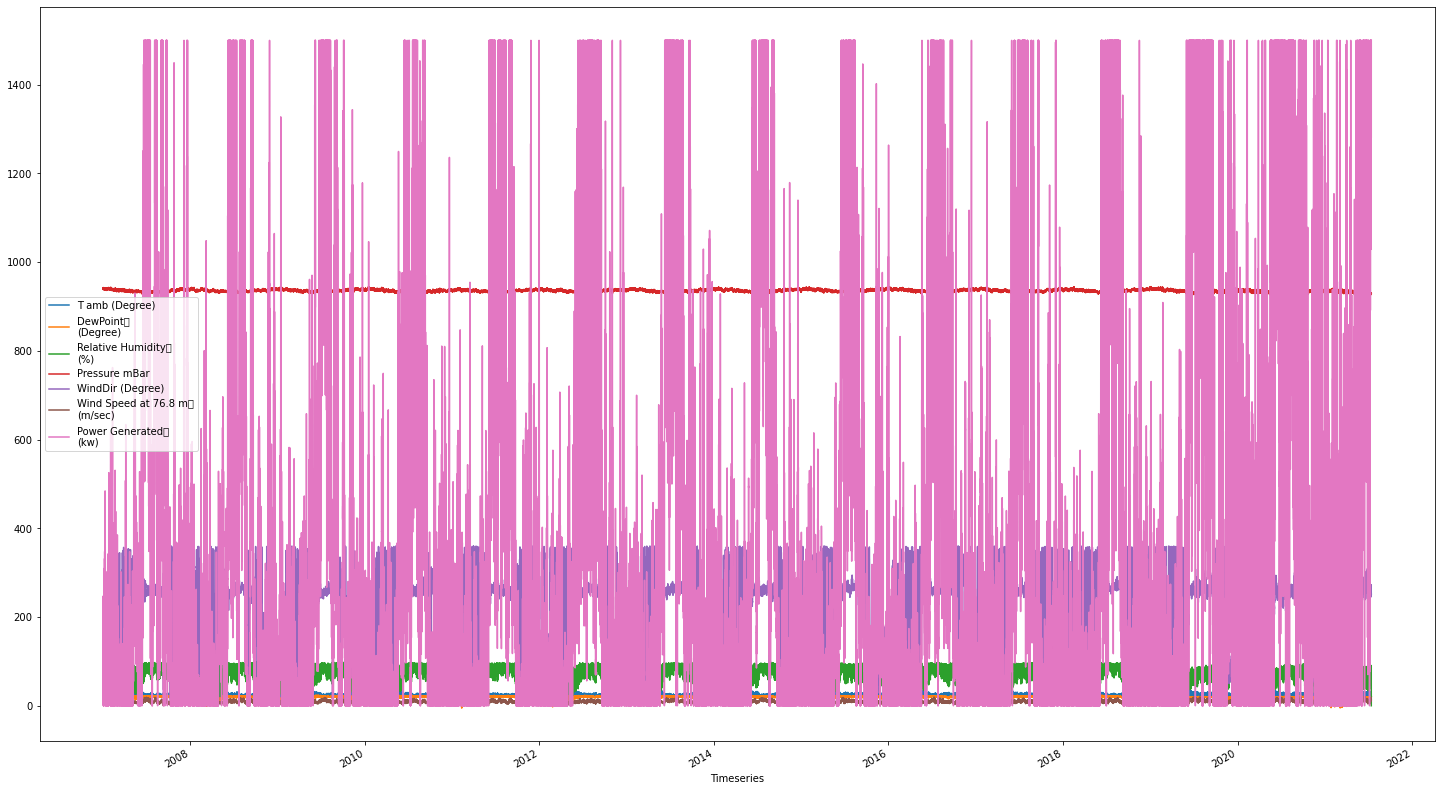

In [149]:
data_dropped.plot(x = 'Timeseries',figsize=(25, 15))
plt.show()

<AxesSubplot:xlabel='Timeseries'>

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


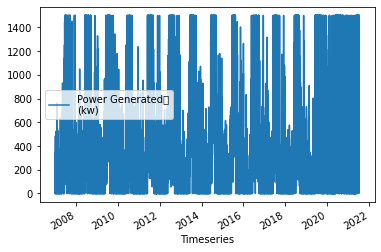

In [147]:
data_dropped.plot.line(x = 'Timeseries', y = 'Power Generated\r\n(kw)')

In [148]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127392 entries, 0 to 127391
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timeseries                     127392 non-null  datetime64[ns]
 1   T amb (Degree)                 127392 non-null  float64       
 2   DewPoint
(Degree)             127392 non-null  float64       
 3   Relative Humidity
(%)         127392 non-null  float64       
 4   Pressure mBar                  127392 non-null  float64       
 5   WindDir (Degree)               127392 non-null  int64         
 6   Wind Speed at 76.8 m
(m/sec)  127392 non-null  float64       
 7   Power Generated
(kw)          127392 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 7.8 MB


In [102]:
data_dropped.head()

T amb (Degree)  DewPoint\r\n(Degree)  \
Timeseries                                                  
2007-01-01 00:00:00            17.6                   8.1   
2007-01-01 01:00:00            17.9                  10.8   
2007-01-01 02:00:00            19.0                  10.8   
2007-01-01 03:00:00            20.6                  10.6   
2007-01-01 04:00:00            22.8                  10.1   

                     Relative Humidity\r\n(%)  Pressure mBar  \
Timeseries                                                     
2007-01-01 00:00:00                      60.1          940.4   
2007-01-01 01:00:00                      63.1          941.4   
2007-01-01 02:00:00                      59.3          942.1   
2007-01-01 03:00:00                      52.8          942.4   
2007-01-01 04:00:00                      44.6          942.3   

                     WindDir (Degree)  Wind Speed at 76.8 m\r\n(m/sec)  \
Timeseries                                                               
2007-01-01 00:00:00               101                             4.08   
2007-01-01 01:00:00               114                             4.74   
2007-01-01 02:00:00               116                             5.55   
2007-01-01 03:00:00               113                             6.04   
2007-01-01 04:00:00               106                             6.21   

                     Power Generated\r\n(kw)  
Timeseries                                    
2007-01-01 00:00:00                    57.36  
2007-01-01 01:00:00                    89.54  
2007-01-01 02:00:00                   143.86  
2007-01-01 03:00:00                   184.45  
2007-01-01 04:00:00                   198.31

In [103]:
df = pd.read_csv('Bangaluru_Wind Generation.csv',index_col='Timeseries',parse_dates=True)
df = df.drop(columns=['Unnamed: 8', 'Unnamed: 9'])
print('Shape of data',df.shape)
df.head()

Shape of data (127392, 7)


T amb (Degree)  DewPoint\r\n(Degree)  \
Timeseries                                                  
2007-01-01 00:00:00            17.6                   8.1   
2007-01-01 01:00:00            17.9                  10.8   
2007-01-01 02:00:00            19.0                  10.8   
2007-01-01 03:00:00            20.6                  10.6   
2007-01-01 04:00:00            22.8                  10.1   

                     Relative Humidity\r\n(%)  Pressure mBar  \
Timeseries                                                     
2007-01-01 00:00:00                      60.1          940.4   
2007-01-01 01:00:00                      63.1          941.4   
2007-01-01 02:00:00                      59.3          942.1   
2007-01-01 03:00:00                      52.8          942.4   
2007-01-01 04:00:00                      44.6          942.3   

                     WindDir (Degree)  Wind Speed at 76.8 m\r\n(m/sec)  \
Timeseries                                                               
2007-01-01 00:00:00               101                             4.08   
2007-01-01 01:00:00               114                             4.74   
2007-01-01 02:00:00               116                             5.55   
2007-01-01 03:00:00               113                             6.04   
2007-01-01 04:00:00               106                             6.21   

                     Power Generated\r\n(kw)  
Timeseries                                    
2007-01-01 00:00:00                    57.36  
2007-01-01 01:00:00                    89.54  
2007-01-01 02:00:00                   143.86  
2007-01-01 03:00:00                   184.45  
2007-01-01 04:00:00                   198.31

In [282]:
#set index of time series

In [286]:
data_dropped = data_dropped.set_index('Timeseries')

KeyError: "None of ['Timeseries'] are in the columns"

In [285]:
data_dropped.head()

T amb (Degree)  DewPoint\r\n(Degree)  \
Timeseries                                                  
2007-01-01 00:00:00            17.6                   8.1   
2007-01-01 01:00:00            17.9                  10.8   
2007-01-01 02:00:00            19.0                  10.8   
2007-01-01 03:00:00            20.6                  10.6   
2007-01-01 04:00:00            22.8                  10.1   

                     Relative Humidity\r\n(%)  Pressure mBar  \
Timeseries                                                     
2007-01-01 00:00:00                      60.1          940.4   
2007-01-01 01:00:00                      63.1          941.4   
2007-01-01 02:00:00                      59.3          942.1   
2007-01-01 03:00:00                      52.8          942.4   
2007-01-01 04:00:00                      44.6          942.3   

                     WindDir (Degree)  Wind Speed at 76.8 m\r\n(m/sec)  \
Timeseries                                                               
2007-01-01 00:00:00             101.0                             4.08   
2007-01-01 01:00:00             114.0                             4.74   
2007-01-01 02:00:00             116.0                             5.55   
2007-01-01 03:00:00             113.0                             6.04   
2007-01-01 04:00:00             106.0                             6.21   

                     Power Generated\r\n(kw)  
Timeseries                                    
2007-01-01 00:00:00                    57.36  
2007-01-01 01:00:00                    89.54  
2007-01-01 02:00:00                   143.86  
2007-01-01 03:00:00                   184.45  
2007-01-01 04:00:00                   198.31

In [152]:
data_dropped.dtypes

T amb (Degree)                     float64
DewPoint\r\n(Degree)               float64
Relative Humidity\r\n(%)           float64
Pressure mBar                      float64
WindDir (Degree)                     int64
Wind Speed at 76.8 m\r\n(m/sec)    float64
Power Generated\r\n(kw)            float64
dtype: object

In [153]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [154]:
ad_test(data_dropped['Power Generated\r\n(kw)'])

1. ADF :  -13.762642918447321
2. P-Value :  1.0018473604225429e-25
3. Num Of Lags :  72
4. Num Of Observations Used For ADF Regression: 127319
5. Critical Values :
	 1% :  -3.430401362576261
	 5% :  -2.86156270150769
	 10% :  -2.5667820832088117


In [155]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data_dropped['Power Generated\r\n(kw)'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1413011.064, Time=201.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1467978.554, Time=2.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1425536.576, Time=3.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1424452.346, Time=22.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1467976.557, Time=1.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1420669.526, Time=27.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1420613.835, Time=26.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1412568.485, Time=128.99 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1420481.550, Time=71.52 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1405618.230, Time=213.72 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1411818.893, Time=181.48 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=1411822.527, Time=255.35 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1412534.152, Time=333.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14

In [157]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               127392
Model:               SARIMAX(4, 1, 2)   Log Likelihood             -702801.817
Date:                Mon, 31 Oct 2022   AIC                        1405617.635
Time:                        23:41:10   BIC                        1405685.920
Sample:                             0   HQIC                       1405638.134
                             - 127392                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.3903      0.001   1831.718      0.000       2.388       2.393
ar.L2         -2.1360      0.002  -1047.797      0.000      -2.140      -2.132
ar.L3          0.9247      0.001    725.489      0.000       0.922       0.927
ar.L4         -0.2254      0.001   -361.160      0.000      -0.227      -0.224
ma.L1         -1.8628      0.001  -1434.484      0.000      -1.865      -1.860
ma.L2          0.8957      0.001    715.719      0.000       0.893       0.898
sigma2      3581.0270      2.073   1727.690      0.000    3576.965    3585.089
===================================================================================
Ljung-Box (L1) (Q):                   3.47   Jarque-Bera (JB):         180489674.14
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               4.44   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                       187.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [158]:
print(data_dropped.shape)

(127392, 7)


In [208]:
train = data_dropped.iloc[:-40000]
test = data_dropped.iloc[-40000:]
print(train.shape,test.shape)

(87392, 7) (40000, 7)


In [309]:
model = ARIMA(train['Power Generated\r\n(kw)'],order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Power Generated
(kw)   No. Observations:                87392
Model:                    ARIMA(1, 1, 0)   Log Likelihood             -456443.192
Date:                   Tue, 01 Nov 2022   AIC                         912890.384
Time:                           18:37:23   BIC                         912909.140
Sample:                                0   HQIC                        912896.111
                                 - 87392                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6878      0.001   1152.893      0.000       0.687       0.689
sigma2      2014.4953      1.577   1277.520      0.000    2011.405    2017.586
Ljung-Box (L1) (Q):          

In [348]:
model = ARIMA(train['Power Generated\r\n(kw)'],order=(4, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\lib\site-packages\statsmo

                                 SARIMAX Results                                 
Dep. Variable:     Power Generated
(kw)   No. Observations:                87392
Model:                    ARIMA(4, 1, 2)   Log Likelihood             -450123.067
Date:                   Thu, 03 Nov 2022   AIC                         900260.134
Time:                           20:34:15   BIC                         900325.781
Sample:                                0   HQIC                        900280.178
                                 - 87392                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7794      0.007    104.676      0.000       0.765       0.794
ar.L2          0.7104      0.013     53.866      0.000       0.685       0.736
ar.L3         -0.7973      0.

In [218]:
#Result Of ARIMA Prediction

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


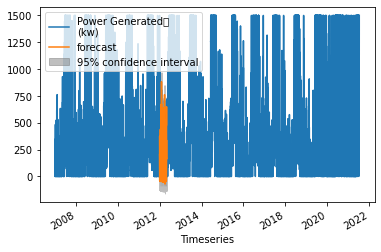

In [310]:
#model_fit.plot_predict(dynamic=False)
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = data_dropped["Power Generated\r\n(kw)"].loc['2007':].plot(ax=ax)
plot_predict(model_fit, '2012-01-01', '2012-05-01', ax=ax)
plt.show()

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


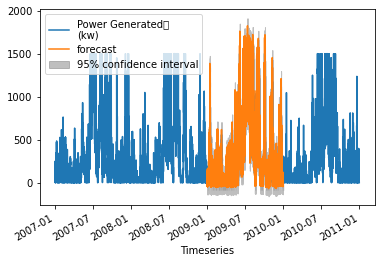

In [311]:
fig, ax = plt.subplots()
ax = data_dropped["Power Generated\r\n(kw)"].loc['2007':'2010'].plot(ax=ax)
plot_predict(model_fit, '2009', '2010', ax=ax)
plt.show()

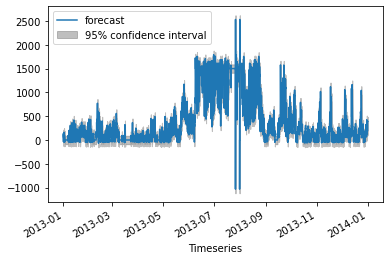

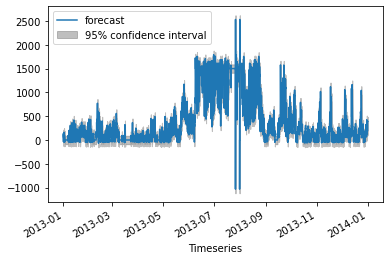

In [312]:
plot_predict(model_fit, '2013', '2014')

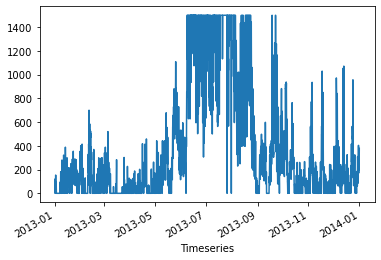

In [313]:
fig, ax = plt.subplots()
ax = data_dropped["Power Generated\r\n(kw)"].loc['2013':'2013'].plot(ax=ax)
plt.show()

In [314]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end)
print(pred)

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


87392     180.450951
87393     206.134256
87394     223.799370
87395     235.949529
87396     244.306473
             ...    
127387    262.717905
127388    262.717905
127389    262.717905
127390    262.717905
127391    262.717905
Name: predicted_mean, Length: 40000, dtype: float64


<AxesSubplot:xlabel='Timeseries'>

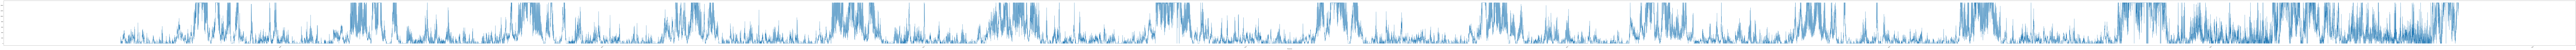

In [45]:
df['Power Generated\n(kw)'].plot(figsize=(500,10))

In [298]:
data_dropped.info

<bound method DataFrame.info of                      T amb (Degree)  DewPoint\r\n(Degree)  \
Timeseries                                                  
2007-01-01 00:00:00            17.6                   8.1   
2007-01-01 01:00:00            17.9                  10.8   
2007-01-01 02:00:00            19.0                  10.8   
2007-01-01 03:00:00            20.6                  10.6   
2007-01-01 04:00:00            22.8                  10.1   
...                             ...                   ...   
2021-07-13 19:06:00            22.6                  19.5   
2021-07-13 20:06:00            22.2                  19.5   
2021-07-13 21:06:00            22.0                  19.6   
2021-07-13 22:06:00            21.9                  19.7   
2021-07-13 23:06:00            21.9                  19.8   

                     Relative Humidity\r\n(%)  Pressure mBar  \
Timeseries                                                     
2007-01-01 00:00:00                      60.1 

In [279]:
data_dropped.describe()

T amb (Degree)  DewPoint\r\n(Degree)  Relative Humidity\r\n(%)  \
count   127392.000000         127392.000000             127392.000000   
mean        25.140319             16.761958                 64.415342   
std          4.075807              4.693364                 22.277394   
min         12.000000             -5.100000                  0.000000   
25%         22.100000             13.700000                 46.400000   
50%         24.400000             18.600000                 67.600000   
75%         27.600000             20.400000                 84.300000   
max         39.300000             25.100000                 99.700000   

       Pressure mBar  WindDir (Degree)  Wind Speed at 76.8 m\r\n(m/sec)  \
count  127392.000000     127392.000000                    127392.000000   
mean      935.451435        188.092832                         6.395340   
std         2.868246         92.355704                         3.463272   
min       922.600000          0.000000                         0.000000   
25%       933.500000         93.000000                         3.760000   
50%       935.400000        242.000000                         5.720000   
75%       937.500000        266.000000                         8.330000   
max       945.200000        360.000000                        25.480000   

       Power Generated\r\n(kw)  
count            127392.000000  
mean                352.834194  
std                 457.078930  
min                   0.000000  
25%                   0.000000  
50%                 152.610000  
75%                 476.670000  
max                1500.000000

In [260]:
data_dropped.dtypes

T amb (Degree)                     float64
DewPoint\r\n(Degree)               float64
Relative Humidity\r\n(%)           float64
Pressure mBar                      float64
WindDir (Degree)                     int64
Wind Speed at 76.8 m\r\n(m/sec)    float64
Power Generated\r\n(kw)            float64
Unnamed: 8                         float64
Unnamed: 9                         float64
dtype: object

In [261]:
data_dropped['WindDir (Degree)'] = data_dropped['WindDir (Degree)'].astype(np.float64)

In [280]:
data_dropped.dtypes

Timeseries                         datetime64[ns]
T amb (Degree)                            float64
DewPoint\r\n(Degree)                      float64
Relative Humidity\r\n(%)                  float64
Pressure mBar                             float64
WindDir (Degree)                          float64
Wind Speed at 76.8 m\r\n(m/sec)           float64
Power Generated\r\n(kw)                   float64
dtype: object

In [49]:
df = pd.read_csv("cleandata.csv",parse_dates=True,index_col=0)

data.head()

T amb (Degree)  DewPoint\n(Degree)  \
Timeseries                                                
2007-01-01 00:00:00            17.6                 8.1   
2007-01-01 01:00:00            17.9                10.8   
2007-01-01 02:00:00            19.0                10.8   
2007-01-01 03:00:00            20.6                10.6   
2007-01-01 04:00:00            22.8                10.1   

                     Relative Humidity\n(%)  Pressure mBar  WindDir (Degree)  \
Timeseries                                                                     
2007-01-01 00:00:00                    60.1          940.4               101   
2007-01-01 01:00:00                    63.1          941.4               114   
2007-01-01 02:00:00                    59.3          942.1               116   
2007-01-01 03:00:00                    52.8          942.4               113   
2007-01-01 04:00:00                    44.6          942.3               106   

                     Wind Speed at 76.8 m\n(m/sec)  Power Generated\n(kw)  \
Timeseries                                                                  
2007-01-01 00:00:00                           4.08                  57.36   
2007-01-01 01:00:00                           4.74                  89.54   
2007-01-01 02:00:00                           5.55                 143.86   
2007-01-01 03:00:00                           6.04                 184.45   
2007-01-01 04:00:00                           6.21                 198.31   

                     Unnamed: 8  Unnamed: 9  
Timeseries                                   
2007-01-01 00:00:00         NaN         NaN  
2007-01-01 01:00:00         NaN         NaN  
2007-01-01 02:00:00         NaN         NaN  
2007-01-01 03:00:00         NaN         NaN  
2007-01-01 04:00:00         NaN         NaN

In [105]:
data_dropped.dtypes

T amb (Degree)                     float64
DewPoint\r\n(Degree)               float64
Relative Humidity\r\n(%)           float64
Pressure mBar                      float64
WindDir (Degree)                     int64
Wind Speed at 76.8 m\r\n(m/sec)    float64
Power Generated\r\n(kw)            float64
dtype: object

In [145]:
data_dropped['Timeseries'] = pd.to_datetime(data_dropped['Timeseries'], format = '%Y-%m-%d %H:%M:%S')

In [263]:
data.reset_index(inplace=True)

In [264]:
data.head()

Timeseries  T amb (Degree)  DewPoint\r\n(Degree)  \
0  01/01/2007 0:00            17.6                   8.1   
1  01/01/2007 1:00            17.9                  10.8   
2  01/01/2007 2:00            19.0                  10.8   
3  01/01/2007 3:00            20.6                  10.6   
4  01/01/2007 4:00            22.8                  10.1   

   Relative Humidity\r\n(%)  Pressure mBar  WindDir (Degree)  \
0                      60.1          940.4             101.0   
1                      63.1          941.4             114.0   
2                      59.3          942.1             116.0   
3                      52.8          942.4             113.0   
4                      44.6          942.3             106.0   

   Wind Speed at 76.8 m\r\n(m/sec)  Power Generated\r\n(kw)  Unnamed: 8  \
0                             4.08                    57.36         NaN   
1                             4.74                    89.54         NaN   
2                             5.55                   143.86         NaN   
3                             6.04                   184.45         NaN   
4                             6.21                   198.31         NaN   

   Unnamed: 9  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [276]:
data['Timeseries'].unique()

array(['01/01/2007 0:00', '01/01/2007 1:00', '01/01/2007 2:00', ...,
       '7/13/2021 21:06', '7/13/2021 22:06', '7/13/2021 23:06'],
      dtype=object)

In [277]:
data.dtypes

Timeseries                          object
T amb (Degree)                     float64
DewPoint\r\n(Degree)               float64
Relative Humidity\r\n(%)           float64
Pressure mBar                      float64
WindDir (Degree)                   float64
Wind Speed at 76.8 m\r\n(m/sec)    float64
Power Generated\r\n(kw)            float64
Unnamed: 8                         float64
Unnamed: 9                         float64
dtype: object

In [124]:
data['Timeseries'] = pd.to_datetime(data['Timeseries'], format = '%m/%d/%Y %H:%M')

In [236]:
data.dtypes

level_0                                     int64
index                                       int64
Timeseries                         datetime64[ns]
T amb (Degree)                            float64
DewPoint\r\n(Degree)                      float64
Relative Humidity\r\n(%)                  float64
Pressure mBar                             float64
WindDir (Degree)                            int64
Wind Speed at 76.8 m\r\n(m/sec)           float64
Power Generated\r\n(kw)                   float64
Unnamed: 8                                float64
Unnamed: 9                                float64
dtype: object

In [168]:
data_dropped.reset_index(inplace=True)

In [278]:
data_dropped.dtypes

Timeseries                         datetime64[ns]
T amb (Degree)                            float64
DewPoint\r\n(Degree)                      float64
Relative Humidity\r\n(%)                  float64
Pressure mBar                             float64
WindDir (Degree)                          float64
Wind Speed at 76.8 m\r\n(m/sec)           float64
Power Generated\r\n(kw)                   float64
dtype: object

In [287]:
data_dropped.head()

T amb (Degree)  DewPoint\r\n(Degree)  \
Timeseries                                                  
2007-01-01 00:00:00            17.6                   8.1   
2007-01-01 01:00:00            17.9                  10.8   
2007-01-01 02:00:00            19.0                  10.8   
2007-01-01 03:00:00            20.6                  10.6   
2007-01-01 04:00:00            22.8                  10.1   

                     Relative Humidity\r\n(%)  Pressure mBar  \
Timeseries                                                     
2007-01-01 00:00:00                      60.1          940.4   
2007-01-01 01:00:00                      63.1          941.4   
2007-01-01 02:00:00                      59.3          942.1   
2007-01-01 03:00:00                      52.8          942.4   
2007-01-01 04:00:00                      44.6          942.3   

                     WindDir (Degree)  Wind Speed at 76.8 m\r\n(m/sec)  \
Timeseries                                                               
2007-01-01 00:00:00             101.0                             4.08   
2007-01-01 01:00:00             114.0                             4.74   
2007-01-01 02:00:00             116.0                             5.55   
2007-01-01 03:00:00             113.0                             6.04   
2007-01-01 04:00:00             106.0                             6.21   

                     Power Generated\r\n(kw)  
Timeseries                                    
2007-01-01 00:00:00                    57.36  
2007-01-01 01:00:00                    89.54  
2007-01-01 02:00:00                   143.86  
2007-01-01 03:00:00                   184.45  
2007-01-01 04:00:00                   198.31

In [274]:
data_dropped['Timeseries'] = pd.to_datetime(data_dropped['Timeseries'], format = '%m/%d/%Y %H:%M')

In [175]:
data_dropped.head()

Timeseries  T amb (Degree)  DewPoint\r\n(Degree)  \
0 2007-01-01 00:00:00            17.6                   8.1   
1 2007-01-01 01:00:00            17.9                  10.8   
2 2007-01-01 02:00:00            19.0                  10.8   
3 2007-01-01 03:00:00            20.6                  10.6   
4 2007-01-01 04:00:00            22.8                  10.1   

   Relative Humidity\r\n(%)  Pressure mBar  WindDir (Degree)  \
0                      60.1          940.4               101   
1                      63.1          941.4               114   
2                      59.3          942.1               116   
3                      52.8          942.4               113   
4                      44.6          942.3               106   

   Wind Speed at 76.8 m\r\n(m/sec)  Power Generated\r\n(kw)  
0                             4.08                    57.36  
1                             4.74                    89.54  
2                             5.55                   143.86  
3                             6.04                   184.45  
4                             6.21                   198.31

In [203]:
data_dropped.dtypes

T amb (Degree)                     float64
DewPoint\r\n(Degree)               float64
Relative Humidity\r\n(%)           float64
Pressure mBar                      float64
WindDir (Degree)                     int64
Wind Speed at 76.8 m\r\n(m/sec)    float64
Power Generated\r\n(kw)            float64
dtype: object

In [363]:
tr_start,tr_end = '2007-01-01','2018-01-01'
te_start,te_end = '2018-01-01','2021-01-01'
tra = data_dropped['Power Generated\r\n(kw)'][tr_start:tr_end]
tes = data_dropped['Power Generated\r\n(kw)'][te_start:te_end]

In [372]:
exog_train = data_dropped.drop(['DewPoint\r\n(Degree)','Relative Humidity\r\n(%)','WindDir (Degree)'],axis = 1)[tr_start:tr_end]
exog_test = data_dropped.drop(['DewPoint\r\n(Degree)','Relative Humidity\r\n(%)','WindDir (Degree)'],axis = 1)[te_start:te_end]

In [365]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_end,te_end,exog = exog_test)[1:]
print('ARIMAX model MSE:{}'.format(mean_squared_error(tes,pred)))

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [366]:
start=len(tra)
end=len(tra)+len(tes)-1
pred=model_fit.predict(start=start,end=end)
print(pred)

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


96456     103.227694
96457     103.227694
96458     103.227694
96459     103.227694
96460     103.227694
             ...    
122779    103.227694
122780    103.227694
122781    103.227694
122782    103.227694
122783    103.227694
Name: predicted_mean, Length: 26328, dtype: float64


D:\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


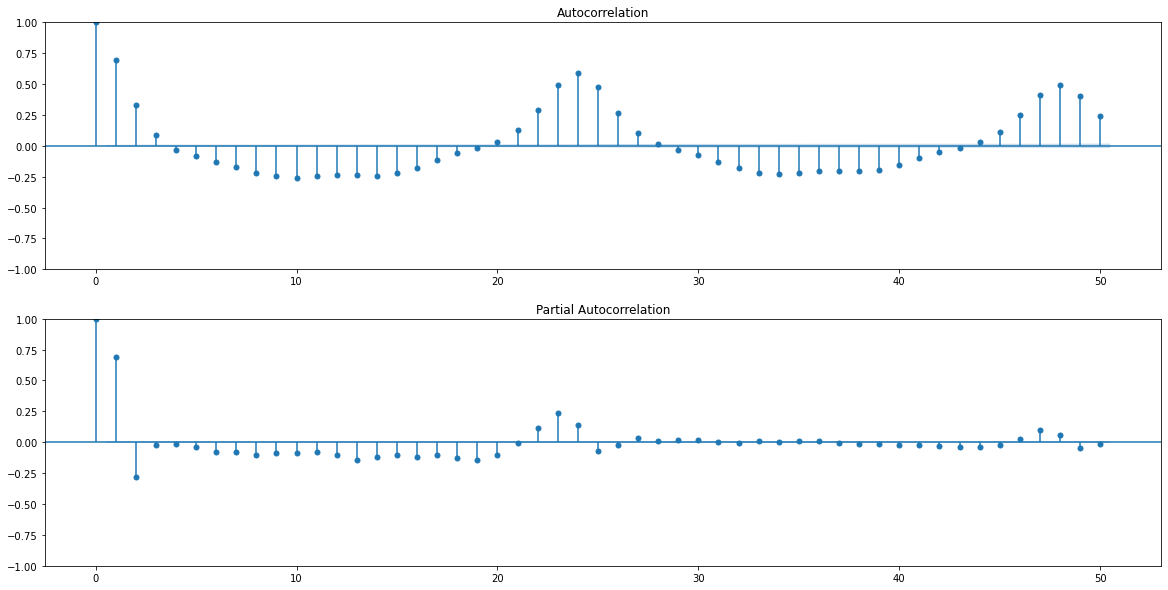

In [367]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [368]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(4,1,2),seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     Power Generated
(kw)   No. Observations:                96456
Model:                  SARIMAX(4, 1, 2)   Log Likelihood             -494926.549
Date:                   Thu, 03 Nov 2022   AIC                         989867.099
Time:                           20:47:40   BIC                         989933.436
Sample:                                0   HQIC                        989887.263
                                 - 96456                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.4599      0.006    395.008      0.000       2.448       2.472
ar.L2         -2.3220      0.011   -210.520      0.000      -2.344      -2.300
ar.L3          1.0584      0.007    162.495      0.000       1.046       1.071
ar.L4         -0.2353      0.001   -158.990      0.000      -0.238      -0.232
ma.L1         -1.8365      0.011   -165.142      0.000      -1.858      -1.815
ma.L2          0.8146      0.011     73.114      0.000       0.793       0.836
sigma2      1580.3303      9.311    169.728      0.000    1562.081    1598.579
===================================================================================
Ljung-Box (L1) (Q):                   9.74   Jarque-Bera (JB):          39934461.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                       102.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [373]:
arimax_2 = sm.tsa.statespace.SARIMAX(tra,order=(4,1,2),seasonal_order=(0,0,0,0),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False).fit()
arimax_2.summary()

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     Power Generated
(kw)   No. Observations:                96456
Model:                  SARIMAX(4, 1, 2)   Log Likelihood              962410.262
Date:                   Thu, 03 Nov 2022   AIC                       -1924798.524
Time:                           20:54:49   BIC                       -1924694.280
Sample:                                0   HQIC                      -1924766.837
                                 - 96456                                         
Covariance Type:                     opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
T amb (Degree)                -1.116e-14   1.56e-25  -7.16e+10      0.000   -1.12e-14   -1.12e-14
Pressure mBar                 -1.721e-14   9.82e-26  -1.75e+11      0.000   -1.72e-14   -1.72e-14
Wind Speed at 76.8 m
(m/sec)  -2.62e-14   3.37e-25  -7.77e+10      0.000   -2.62e-14   -2.62e-14
Power Generated
(kw)             1.0000   3.81e-23   2.63e+22      0.000       1.000       1.000
ar.L1                             2.3868   8.79e-27   2.71e+26      0.000       2.387       2.387
ar.L2                            -0.8451   2.03e-27  -4.17e+26      0.000      -0.845      -0.845
ar.L3                            -0.4782   5.55e-27  -8.62e+25      0.000      -0.478      -0.478
ar.L4                             0.2807   5.18e-26   5.42e+24      0.000       0.281       0.281
ma.L1                            -1.3614    5.4e-21  -2.52e+20      0.000      -1.361      -1.361
ma.L2                            -0.9065   2.92e-21  -3.11e+20      0.000      -0.906      -0.906
sigma2                             1e-10   6.38e-12     15.671      0.000    8.75e-11    1.13e-10
===================================================================================
Ljung-Box (L1) (Q):               50505.04   Jarque-Bera (JB):            767796.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.00
Prob(H) (two-sided):                  0.32   Kurtosis:                        16.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+47. Standard errors may be unstable.
"""

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


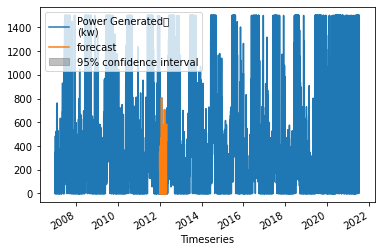

In [374]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = data_dropped["Power Generated\r\n(kw)"].loc['2007':].plot(ax=ax)
plot_predict(arimax_2, '2012-01-01', '2012-05-01', ax=ax)
plt.show()

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


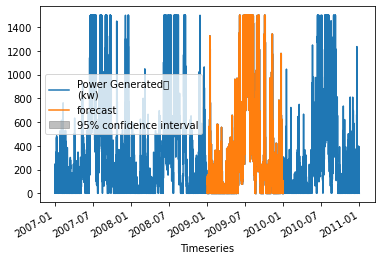

In [375]:
fig, ax = plt.subplots()
ax = data_dropped["Power Generated\r\n(kw)"].loc['2007':'2010'].plot(ax=ax)
plot_predict(arimax_2, '2009', '2010', ax=ax)
plt.show()

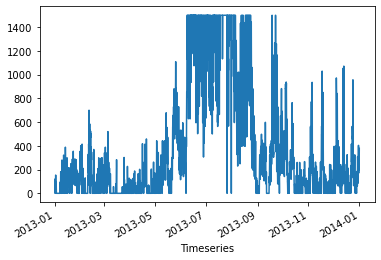

In [378]:
fig, ax = plt.subplots()
ax = data_dropped["Power Generated\r\n(kw)"].loc['2013':'2013'].plot(ax=ax)
plt.show()

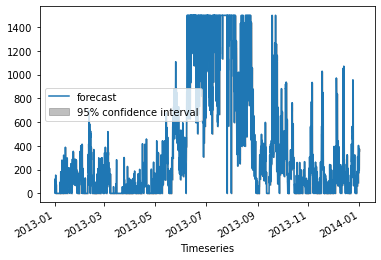

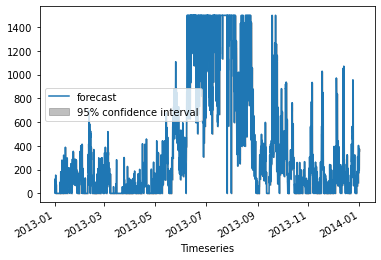

In [376]:
plot_predict(arimax_2, '2013', '2014')

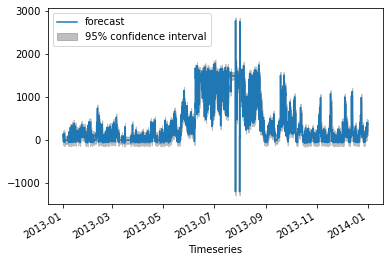

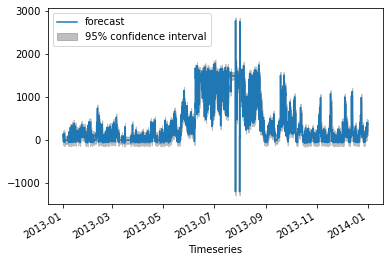

In [377]:
plot_predict(model_fit, '2013', '2014')

D:\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


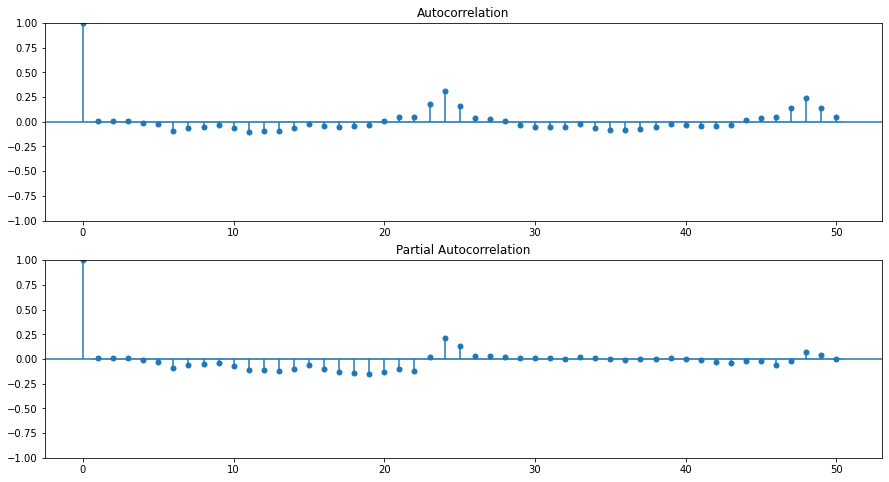

In [326]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

) missing from current font.
  fig.tight_layout()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


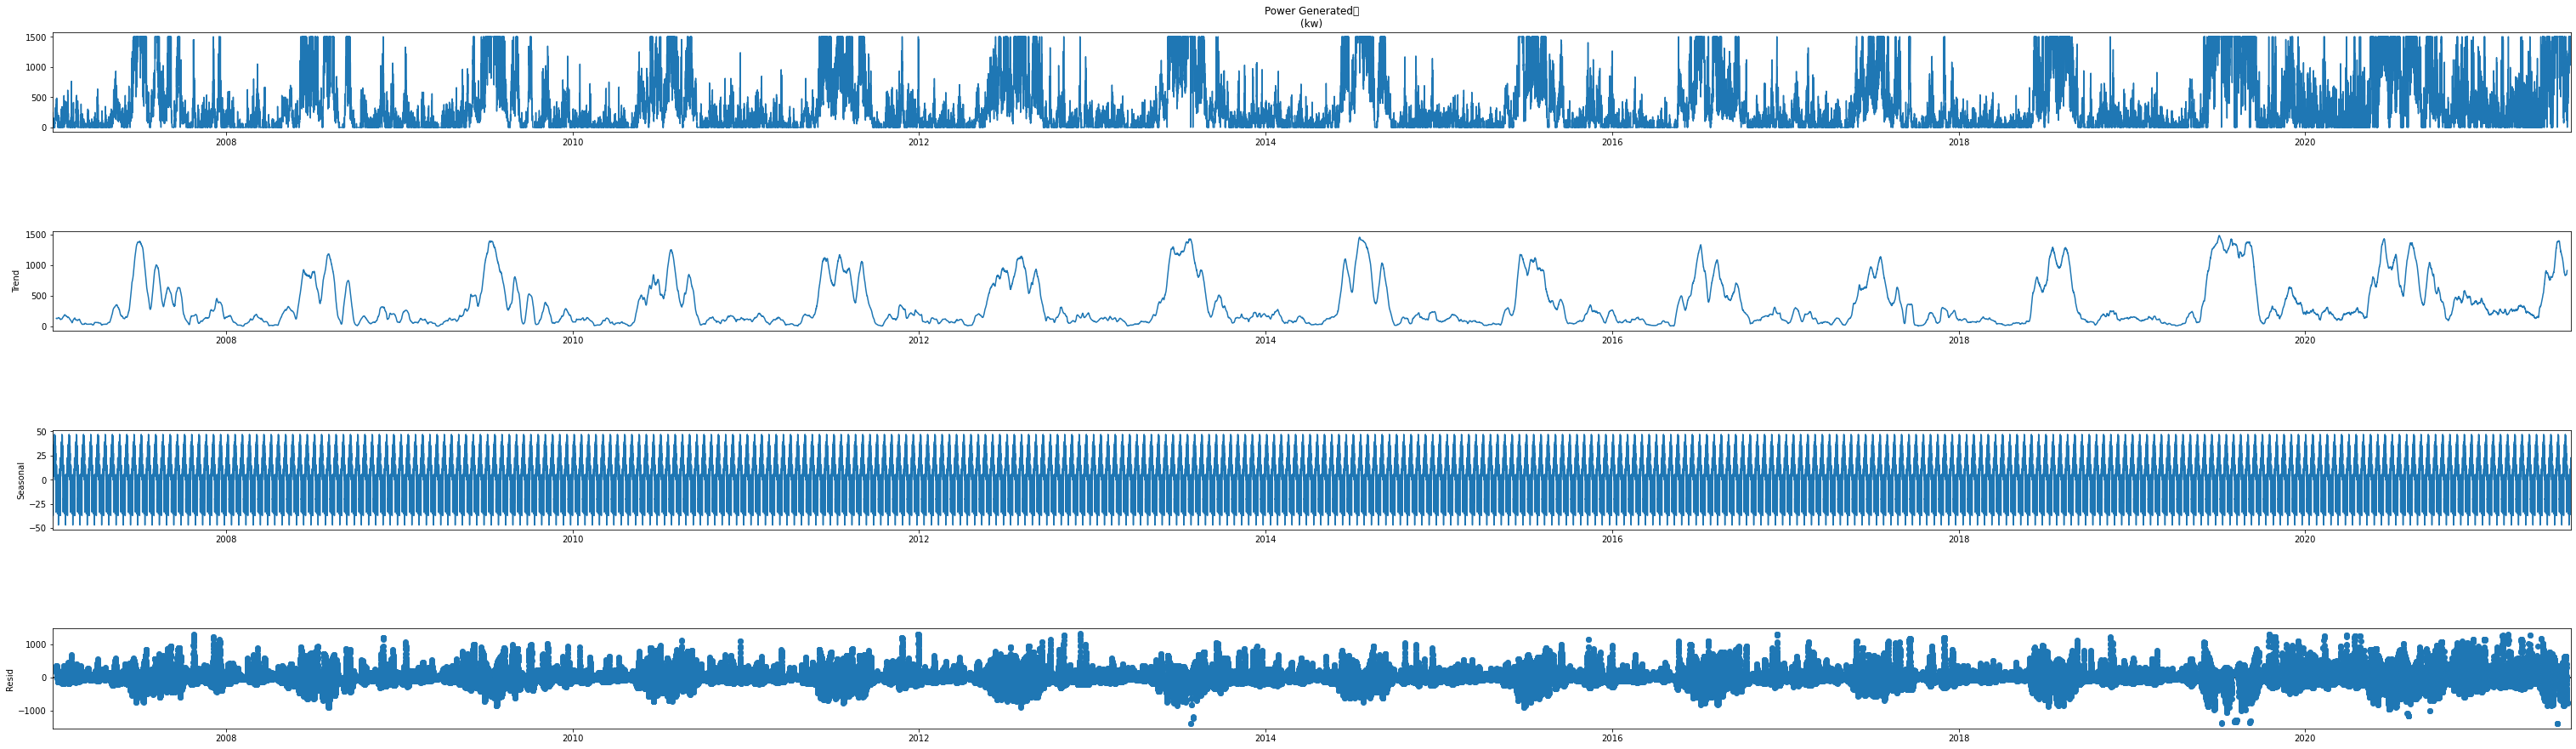

In [347]:
res = seasonal_decompose(data_dropped['Power Generated\r\n(kw)'],period=365)
fig = res.plot()
fig.set_figheight(15)
fig.set_figwidth(50)
plt.show()